<a href="https://colab.research.google.com/github/Zahrahddn/PracticeOne/blob/main/DollarClosePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

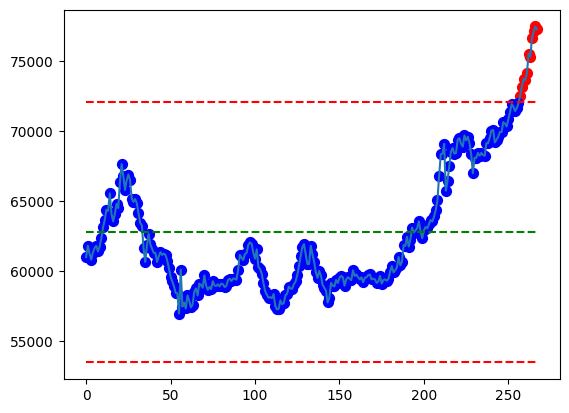

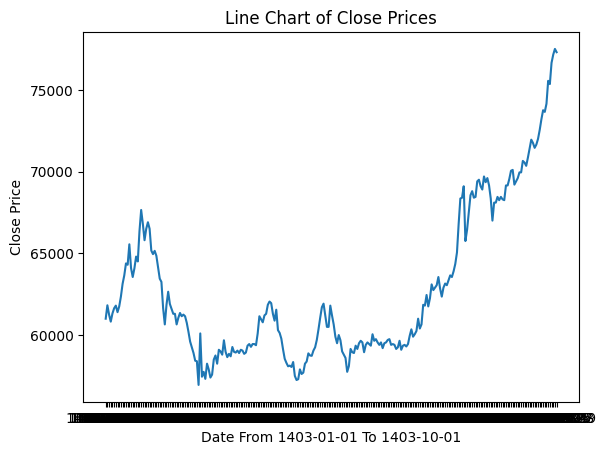

In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


response = requests.get("https://api.navasan.tech/ohlcSearch/?api_key=freedD8cdsjGH47CSJfymKcszswUOrxu&item=usd_sell&start=1403-01-01&end=1403-10-01")
data = response.json()
df = pd.DataFrame(data)

X= df['close']

mean = X.mean()
std = X.std()

upper_bond = mean + std * 2
lower_bond = mean - std * 2

outlier = X[(X > upper_bond) | (X < lower_bond)]


plt.plot(X)

outlier_index = np.where((X > upper_bond) | (X < lower_bond))



cleaned_data =  X[(X < upper_bond) & (X > lower_bond)]
cleaned_data_index = np.where((X < upper_bond) & (X > lower_bond))


plt.plot(np.full_like(X, mean), "g--", label="Mean")
plt.plot(np.full_like(X, upper_bond), "r--", label="Upper Bound")
plt.plot(np.full_like(X, lower_bond), "r--", label="Lower Bound")
plt.scatter(outlier_index, outlier, c="red" , s=50, label="Outlier")
plt.scatter(cleaned_data_index, cleaned_data, c="blue" , s=50, label="Good")

plt.show()




plt.plot(df['date'], df['close'])
plt.xlabel('Date From 1403-01-01 To 1403-10-01')
plt.ylabel('Close Price')
plt.title('Line Chart of Close Prices')
plt.show()
